In [1]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import numpy as np
import pandas as pd
import geopandas as gpd
import morefish as mf

Give a name to your segmentation results.

Here I use `"seg_name='test'"`

In [3]:
mr_dirn = '/gale/netapp/home/wtian/bican/incoming/output/'\
            '202310201411_P28-mouse-brain-B4-1_VMSC12802/region_0'

Load the merfish region 

In [4]:
mr = mf.MerfishRegion(mr_dirn)

2024-02-08 15:52:30.776 | INFO     | morefish.merfish:_prepare_dir:272 - Preparing directories
2024-02-08 15:52:30.779 | INFO     | morefish.merfish:_read_manifest:283 - Reading MERSCOPE manifest
2024-02-08 15:52:30.786 | INFO     | morefish.merfish:_prepare_tiles:298 - Tile file tiles.json loaded
2024-02-08 15:52:30.787 | INFO     | morefish.merfish:__init__:244 - Preparing unit transformer
2024-02-08 15:52:30.790 | INFO     | morefish.merfish:__init__:247 - Preparing transcripts
2024-02-08 15:52:30.790 | INFO     | morefish.merfish:__init__:131 - Loading transcript coord file: transcripts.npz


Name your segmentation task

In [5]:
seg_name='test'

Initialize a segmentor. MOREFISH uses cellpose for cell segmentation

Either a predefined model in cellpose or a customized model can be used.

Here we use a model we customizely pretained with cellpose

In [6]:
pretained_cp_model_path = '/gale/netapp/home/wtian/bican/projects/morefisher/entry/0112from0'
segor = mf.seg.Segmentor(mr, seg_name, model_kws=dict(pretrained_path=pretained_cp_model_path))

Using both DAPI and PolyT stains and z3 images for segemantaion.

The images will be split into tiles (see 01_entry for explanation), and the segmentation will be done for each tile.

This could take hours.

In [12]:
tile_segs = segor.segment_all_tiles(['DAPI','PolyT',None], 3 )

2024-02-08 16:01:14.179 | INFO     | morefish.seg.seg:segment_all_tiles:84 - Segmenting each tile for task "test". Skipping existing segmentations.
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 1551/1551 [00:06<00:00, 255.77it/s]


All tile segmentation results need to be compiled into the final segmentation

In [13]:
cell_segs = segor.compile_segs(tile_segs)

/data/wtian/local/miniconda3/envs/morefish/lib/python3.9/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/data/wtian/local/miniconda3/envs/morefish/lib/python3.9/site-packages/shapely/set_operations.py:340: RuntimeWarning: divide by zero encountered in union
  return lib.union(a, b, **kwargs)
/data/wtian/local/miniconda3/envs/morefish/lib/python3.9/site-packages/shapely/set_operations.py:340: RuntimeWarning: divide by zero encountered in union
  return lib.union(a, b, **kwargs)
/data/wtian/local/miniconda3/envs/morefish/lib/python3.9/site-packages/shapely/set_operations.py:340: RuntimeWarning: divide by zero encountered in union
  return lib.union(a, b, **kwargs)
/data/wtian/local/miniconda3/envs/morefish/lib/python3.9/site-packages/shapely/set_operations.py:340: RuntimeWarning: divide by zero encountered in union
  return lib.union(a, b, **kwargs)
/data/wtian/local/miniconda3/envs/morefish/lib/python3.9

Partition the detected transcripts into cells based on the segmentation results

In [14]:
cxg = segor.partition_transcripts(cell_segs, )

2024-02-08 16:02:39.821 | INFO     | morefish.seg.seg:partition_transcripts:248 - Skipping existing partitions
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 1243/1243 [00:03<00:00, 330.42it/s]


Save the results of segementation

In [15]:
mr.save_reseg_results(cell_segs, cxg, seg_name)

2024-02-08 16:04:17.320 | WARNING  | morefish.merfish:_save_boundaries:406 - /gale/netapp/home/wtian/bican/incoming/output/202310201411_P28-mouse-brain-B4-1_VMSC12802/region_0/MOREFISH/ReSeg/test/cell_boundaries.parquet already exists. Use "override=True" if you want to update it
2024-02-08 16:04:17.321 | WARNING  | morefish.merfish:_save_meta:430 - /gale/netapp/home/wtian/bican/incoming/output/202310201411_P28-mouse-brain-B4-1_VMSC12802/region_0/MOREFISH/ReSeg/test/cell_metadata.csv already exists. Use "override=True" if you want to update it
2024-02-08 16:04:17.322 | WARNING  | morefish.merfish:_save_cellbygene:451 - /gale/netapp/home/wtian/bican/incoming/output/202310201411_P28-mouse-brain-B4-1_VMSC12802/region_0/MOREFISH/ReSeg/test/cell_by_gene.csv already exists. Use "override=True" if you want to update it


Now the result can be loaded for further analysis

In [16]:
mr.load_segmentation_results(seg_name)

2024-02-08 16:04:49.280 | INFO     | morefish.merfish:load_segmentation_results:497 - Loading segmentation results for "test"


Anndata that can be further analyzed with scanpy

In [17]:
mr.adata

AnnData object with n_obs × n_vars = 352262 × 500
    obs: 'fov', 'volume', 'center_x', 'center_y', 'min_x', 'min_y', 'max_x', 'max_y', 'anisotropy', 'transcript_count', 'perimeter_area_ratio', 'solidity', 'DAPI_raw', 'DAPI_high_pass', 'PolyT_raw', 'PolyT_high_pass'
    uns: 'neg_probs'

Cell segmentation

<Axes: >

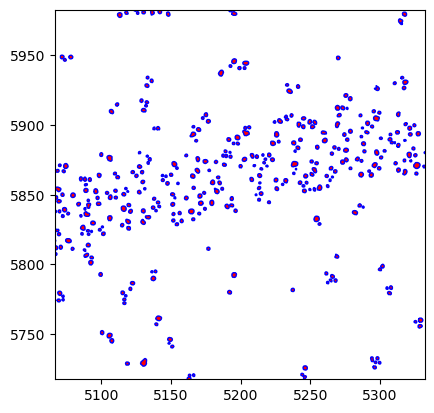

In [20]:
tile_i = 717
mf.pl.boundaryplot(mr, tile_i, 
                   facecolor='r', edgecolor='b', linewidth=1)